In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import mean

In [ ]:
df = pd.read_csv("/content/tips.csv")
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<Axes: xlabel='day'>

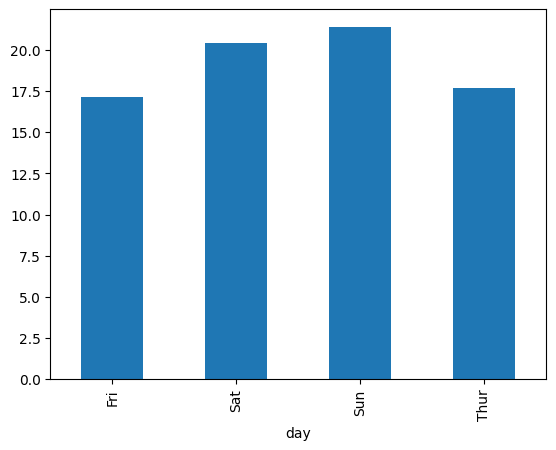

In [ ]:
#using grouby and mean to get graph
bill_per_day = df.groupby("day", as_index = True)["total_bill"].mean()
bill_per_day.plot(kind="bar")

<Axes: xlabel='day,size'>

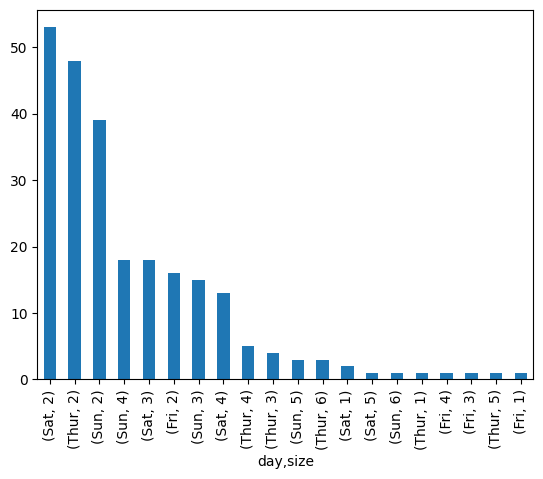

In [ ]:
#instances of size per table a day
day_size = df[["day","size"]].value_counts()
day_size.plot(kind="bar")

<Axes: xlabel='size'>

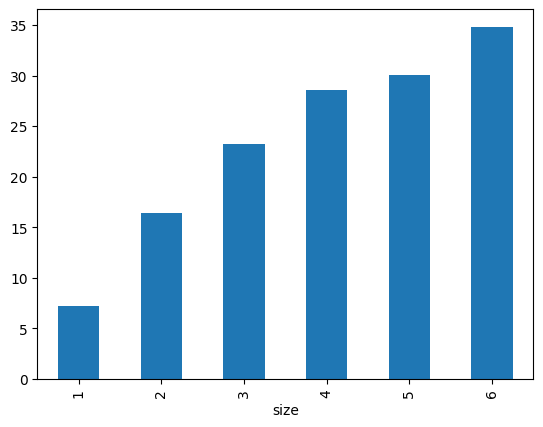

In [ ]:
#groupby and mean to get the mean of spent money per size of table
bill_per_size = df.groupby("size", as_index = True)["total_bill"].mean()
bill_per_size.plot(kind="bar")

#Problem 2

<Axes: xlabel='sex'>

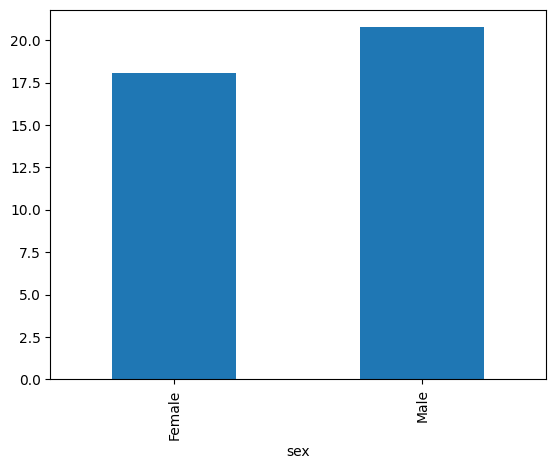

In [ ]:
#Difference of total bill between male and female
bill_per_gender = df.groupby("sex", as_index = True)["total_bill"].mean()
bill_per_gender.plot(kind="bar")

<Axes: xlabel='sex,size'>

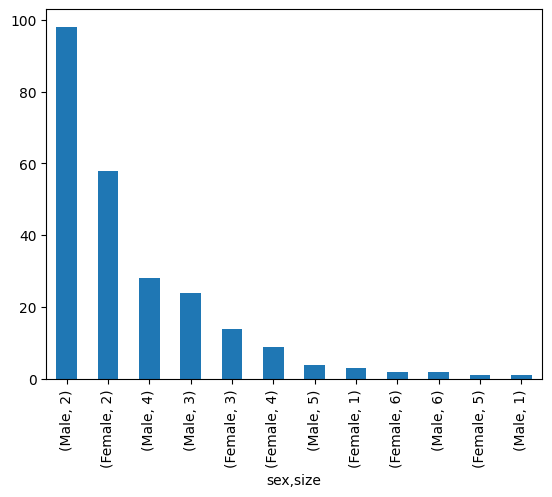

In [ ]:
#Usual table size for male and female party/group
sex_size = df[["sex","size"]].value_counts()
sex_size.plot(kind="bar")

#Problem 3

<Axes: xlabel='time'>

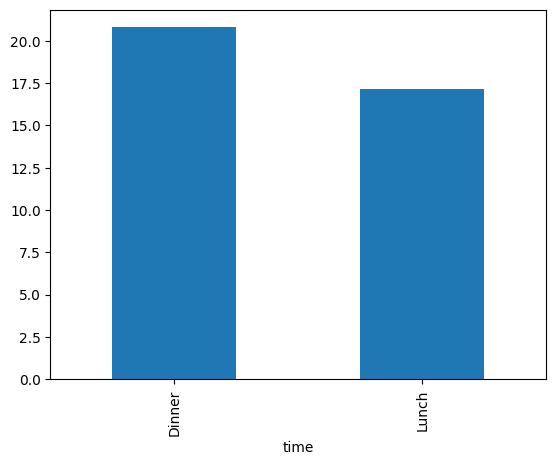

In [ ]:
#Spent money over Dinner/Lunch
bill_time = df.groupby("time", as_index = True)["total_bill"].mean()
bill_time.plot(kind="bar")

<Axes: xlabel='time,size'>

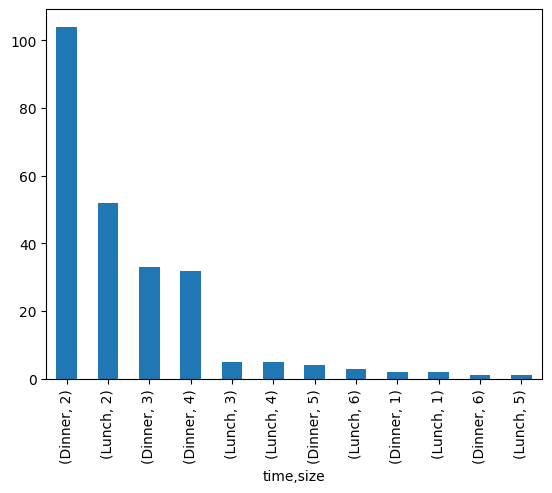

In [ ]:
#Usual group size at certain time
time_size = df[["time","size"]].value_counts()
time_size.plot(kind="bar")

#Regression

In [ ]:
#convert day,time, and sex to numeric
df["day_num"] = df["day"].replace({"Thur":4,"Fri":5,"Sat":6,"Sun":7})
df["time_num"] = df["time"].replace({"Dinner":1,"Lunch":0})
df["sex_num"] = df["sex"].replace({"Male":1,"Female":0})

In [ ]:
var_x = df[["total_bill","size","day_num","time_num","sex_num"]]
var_y = df["tip"]

In [ ]:
#making the model w/o hyper parameters
train_x ,test_x ,train_y , test_y = train_test_split(var_x,var_y, train_size = 0.2)
lr = LinearRegression()
lr.fit(train_x,train_y)
pred_y = lr.predict(test_x)

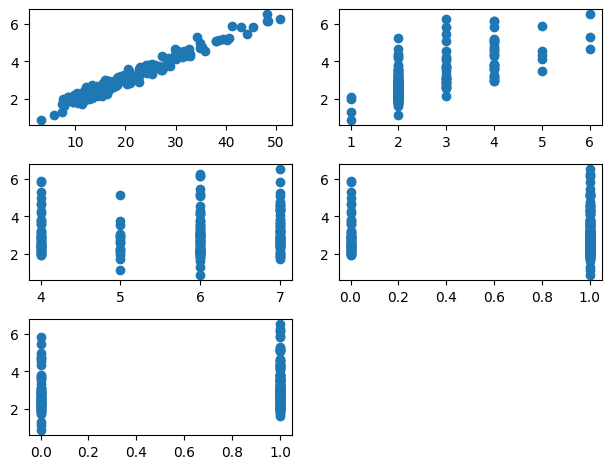

In [ ]:
#plotting predicted data of tip based on different categories
num_plot = 1
for x in train_x:
  plt.subplot(3,2,num_plot)
  plt.scatter(test_x[x],pred_y)
  num_plot+=1
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(test_y,pred_y)
mse = mean_squared_error(test_y,pred_y)
print(f"MAE = {mae} \nMSE = {mse}")

MAE = 0.8097983216804561 
MSE = 1.1660776259459293
